# Relatório Final

### Inteligência Computacional II

#### Aluna: Vilma Bezerra


In [11]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

## Experimento 1

In [12]:
banana_data = pd.read_csv('banana.dat', header=None)

### Parte 1 

#### Geração da base de dados Banana

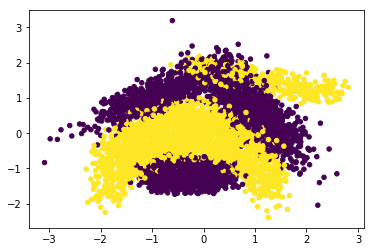

In [26]:
plt.scatter(banana_data[0], banana_data[1], c= data[2],  
            s=20) 

Pode-se observar que os dados já se encontram num certo padrão que é de certa forma desafiador para uma aplicação eficaz de um modelo de classificação.

### Parte 2

#### Testando SVM e seus diferentes kernels na separação dos dados

In [19]:
classifiers = {
#     "Sigmoid - gamma 1": SVC(kernel='sigmoid', gamma=1), 
#     "Sigmoid - gamma .5": SVC(kernel='sigmoid', gamma=0.5), 
#     "Sigmoid - gamma .01": SVC(kernel='sigmoid', gamma=.01),
    "RBF - gamma 1": SVC(gamma=1),
#     "RBF - gamma .5": SVC(gamma=.5),
#     "RBF - gamma .01": SVC(gamma=.01),
#     "Poly - gamma 1":SVC(kernel='poly', gamma=1),
#     "Poly - gamma .5":SVC(kernel='poly', gamma=.5),
#     "Poly - gamma .01":SVC(kernel='poly', gamma=.01),
    "Random Forest": RandomForestClassifier(),
    "Random Forest - random state": RandomForestClassifier(random_state=1),
    "Random Forest - criterion": RandomForestClassifier(criterion='entropy'),
#     "Gaussian": GaussianProcessClassifier(),
#     "Neighbours": KNeighborsClassifier(),
}
X, y = banana_data.values[:, :2], banana_data.values[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
Ks = [2, 5, 10]
min_Val = 1.0
max_Val = 0.0
for name, clf in classifiers.items():
    print('\n CLASSIFIER: ', name)
    for k in Ks:
        print('K: ', k)
        kf = KFold(n_splits=k)
        iterations_score = []
        iterations_eout = []
        for train_index, val_index in kf.split(X_train):
            Xk_train, X_val = X_train[train_index], X_train[val_index]
            yk_train, y_val = y_train[train_index], y_train[val_index]

            clf.fit(Xk_train, yk_train)
            iterations_score.append(clf.score(X_val, y_val))
            iterations_eout.append(1 - clf.score(X_test, y_test))
            
        iter_Eout = np.mean(iterations_eout)
        iter_Val = np.mean(iterations_score)
        print('Average Score: ', iter_Val)
        print('Average Eout: ', iter_Eout)
        if iter_Val < min_Val:
            min_Val = iter_Val
            print('We got a worse result:', min_Val)
        if iter_Val > max_Val:
            max_Val = iter_Val
            print('We got a better result:', max_Val)
        


 CLASSIFIER:  RBF - gamma 1
K:  2
Average Score:  0.9066037735849057
Average Eout:  0.10613207547169812
We got a worse result: 0.9066037735849057
We got a better result: 0.9066037735849057
K:  5
Average Score:  0.9084905660377359
Average Eout:  0.10415094339622641
We got a better result: 0.9084905660377359
K:  10
Average Score:  0.9075471698113207
Average Eout:  0.10405660377358492

 CLASSIFIER:  Random Forest
K:  2
Average Score:  0.8900943396226415
Average Eout:  0.11650943396226415
We got a worse result: 0.8900943396226415
K:  5
Average Score:  0.8905660377358491
Average Eout:  0.11660377358490567
K:  10
Average Score:  0.8941037735849056
Average Eout:  0.11801886792452829

 CLASSIFIER:  Random Forest - random state
K:  2
Average Score:  0.8884433962264151
Average Eout:  0.1132075471698113
We got a worse result: 0.8884433962264151
K:  5
Average Score:  0.8870283018867925
Average Eout:  0.11566037735849055
We got a worse result: 0.8870283018867925
K:  10
Average Score:  0.8910377358

### Parte 3

#### Gerando gráfico com piores e melhores resultados e seus vetores suportes

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


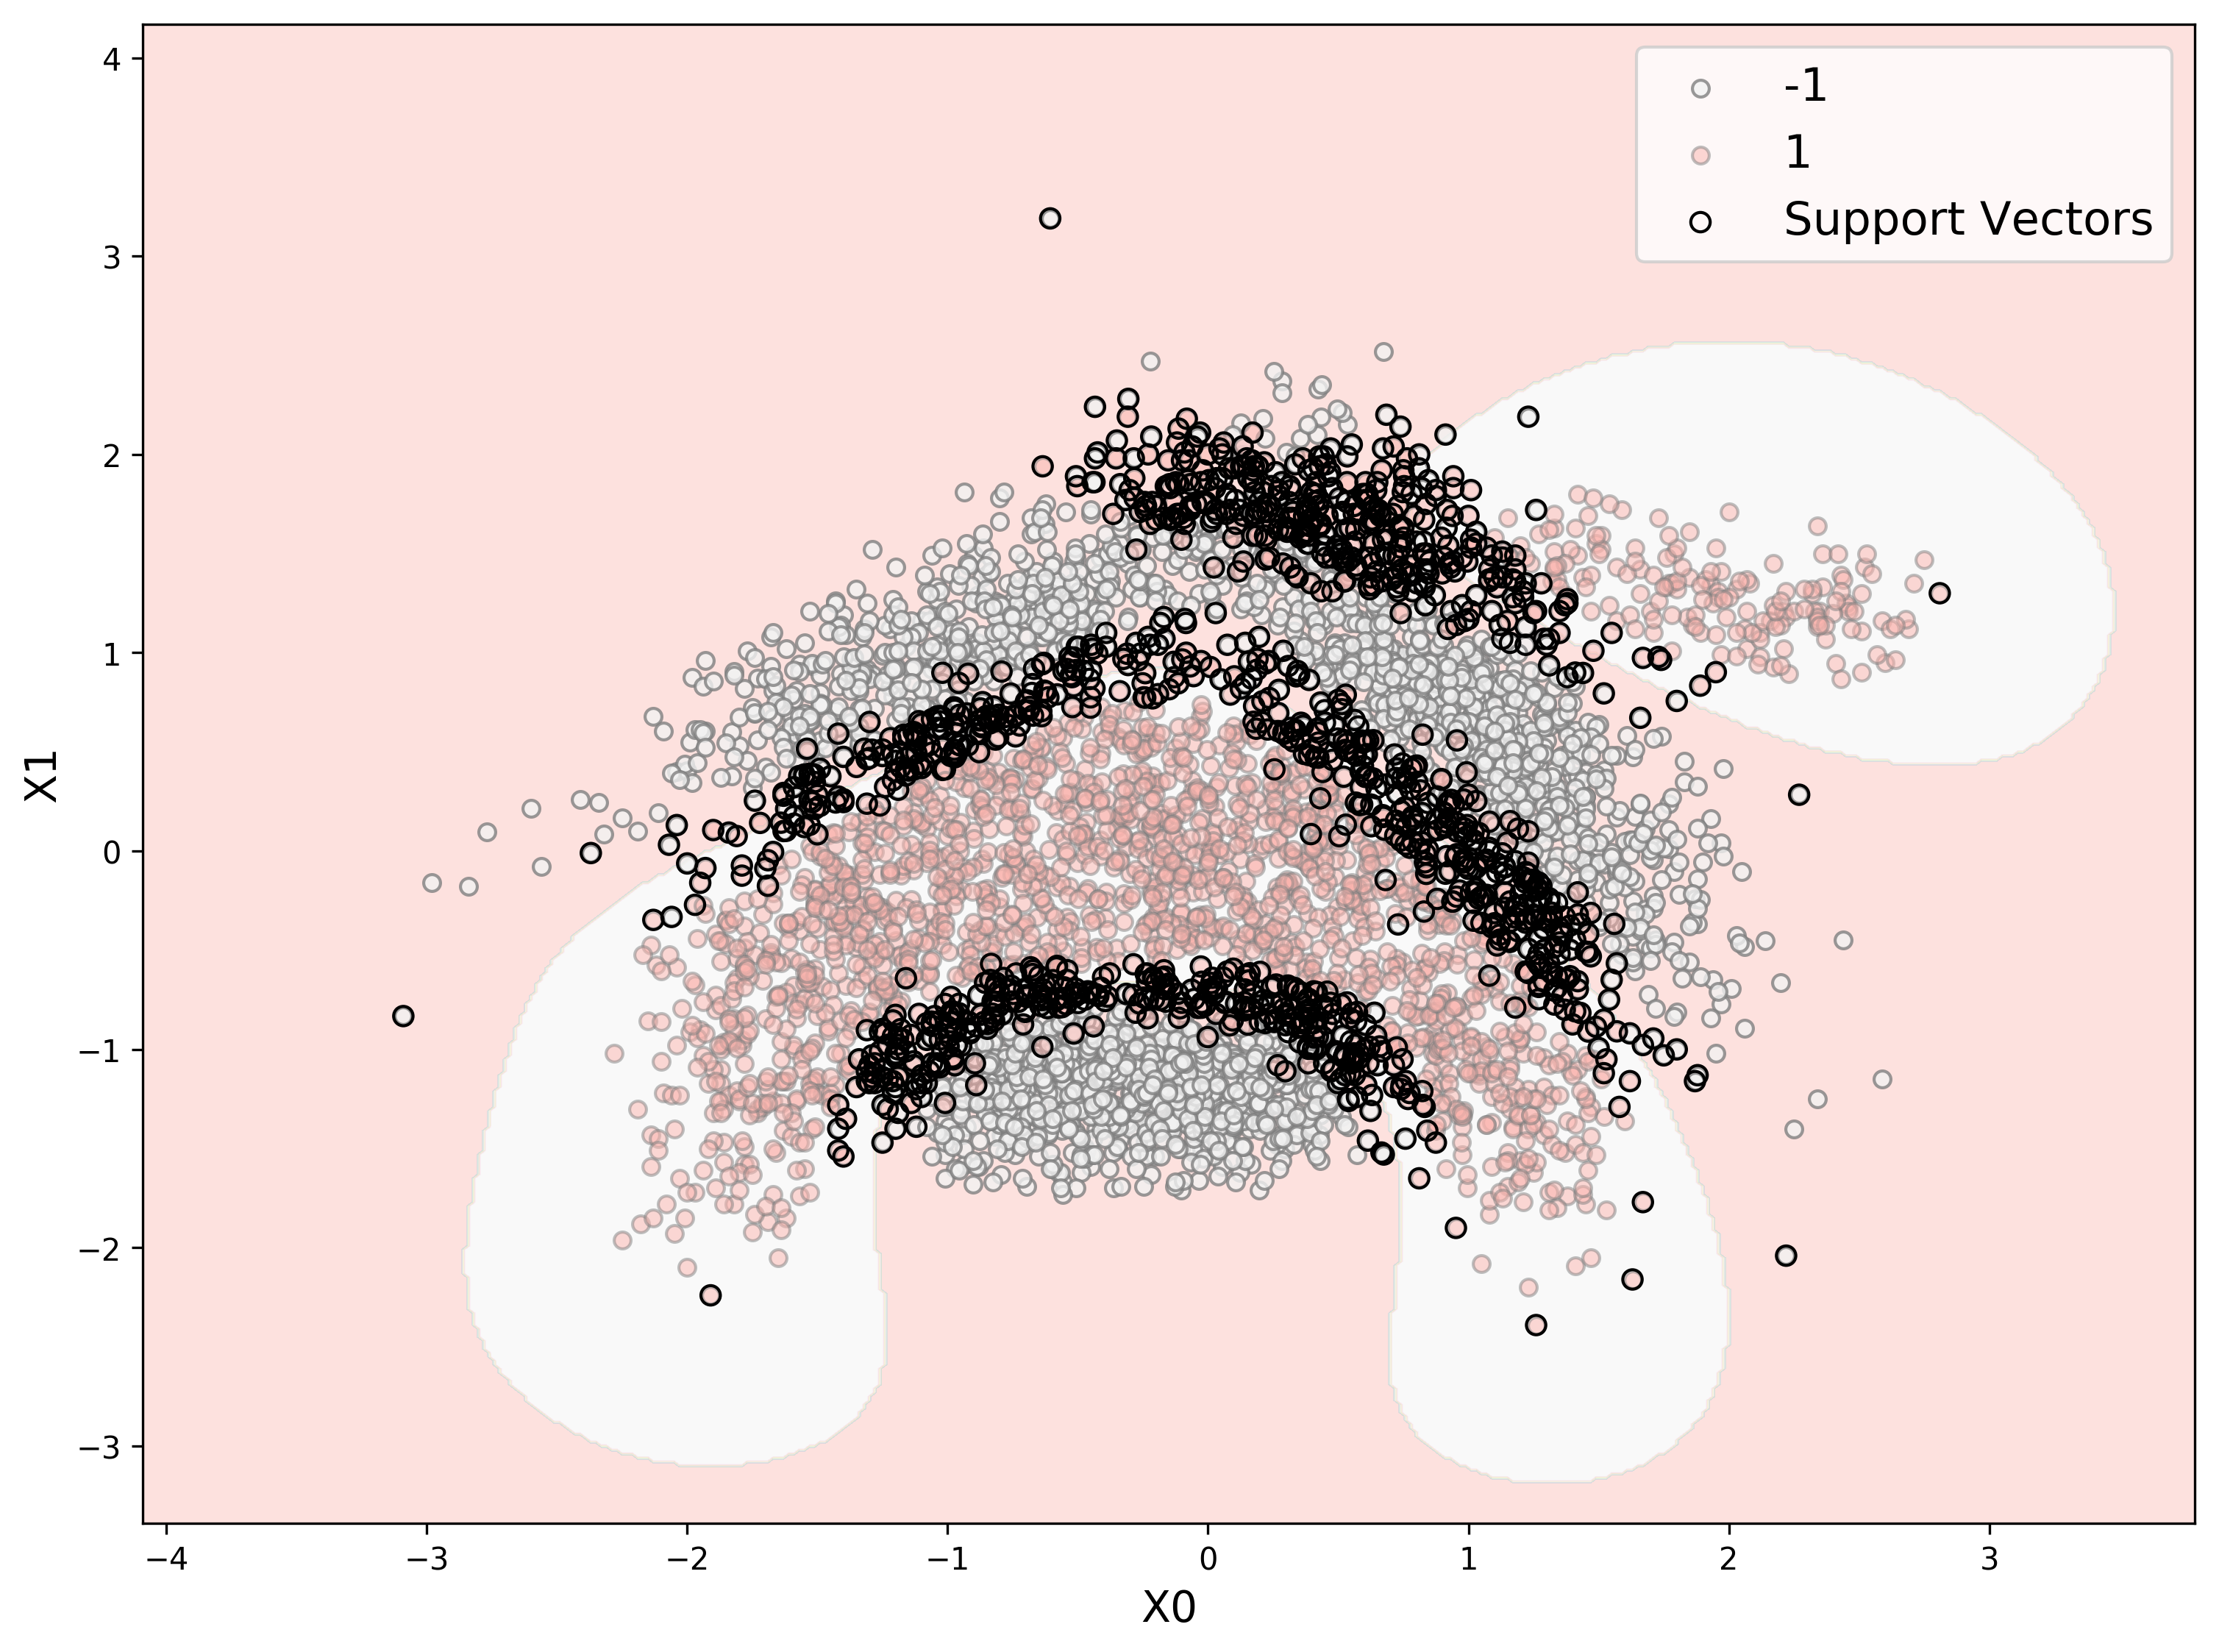

In [7]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_model_banana_result(model, data=banana_data, n_features=2):
    X, y = data.values[:, :n_features], data.values[:, n_features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
    clf = model.fit(X, y)

    fig, ax = plt.subplots(figsize=(12,9), dpi=300)

    cmap = plt.get_cmap('Pastel1')

    c0, c1 = np.array(list(cmap.colors)[-1]), np.array(list( cmap.colors)[0])
    c_dict1={-1:c0, 1: c1}
    # title for the plots
    title = ('Decision surface of RBF SVC ')
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    Y_tar_list = y.tolist()
    labels1 = [int(target1) for target1 in Y_tar_list]

    labl1 = {-1: '-1', 1: '1'}
    alpha1 = {-1:.8, 1:.5}

    plot_contours(ax, clf, xx, yy, alpha=0.4, cmap=cmap)
    for l1 in np.unique(labels1):
        ix1 = np.where(labels1==l1)
        ax.scatter(X0[ix1], X1[ix1],c=c_dict1[l1], label=labl1[l1], 
                   s=30, alpha=alpha1[l1], edgecolors='grey')
    if isinstance(model, SVC):
        ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1], 
                   label='Support Vectors', s=40, edgecolors='black', facecolor='none')


    plt.legend(fontsize=15)

    plt.xlabel('X0', fontsize=14)
    plt.ylabel('X1', fontsize=14)
    plt.savefig('Classify Banana Set.png', dpi=300)
    plt.show()

# The best result: RBF - gamma 1
model = classifiers['RBF - gamma 1']
plot_model_banana_result(model)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


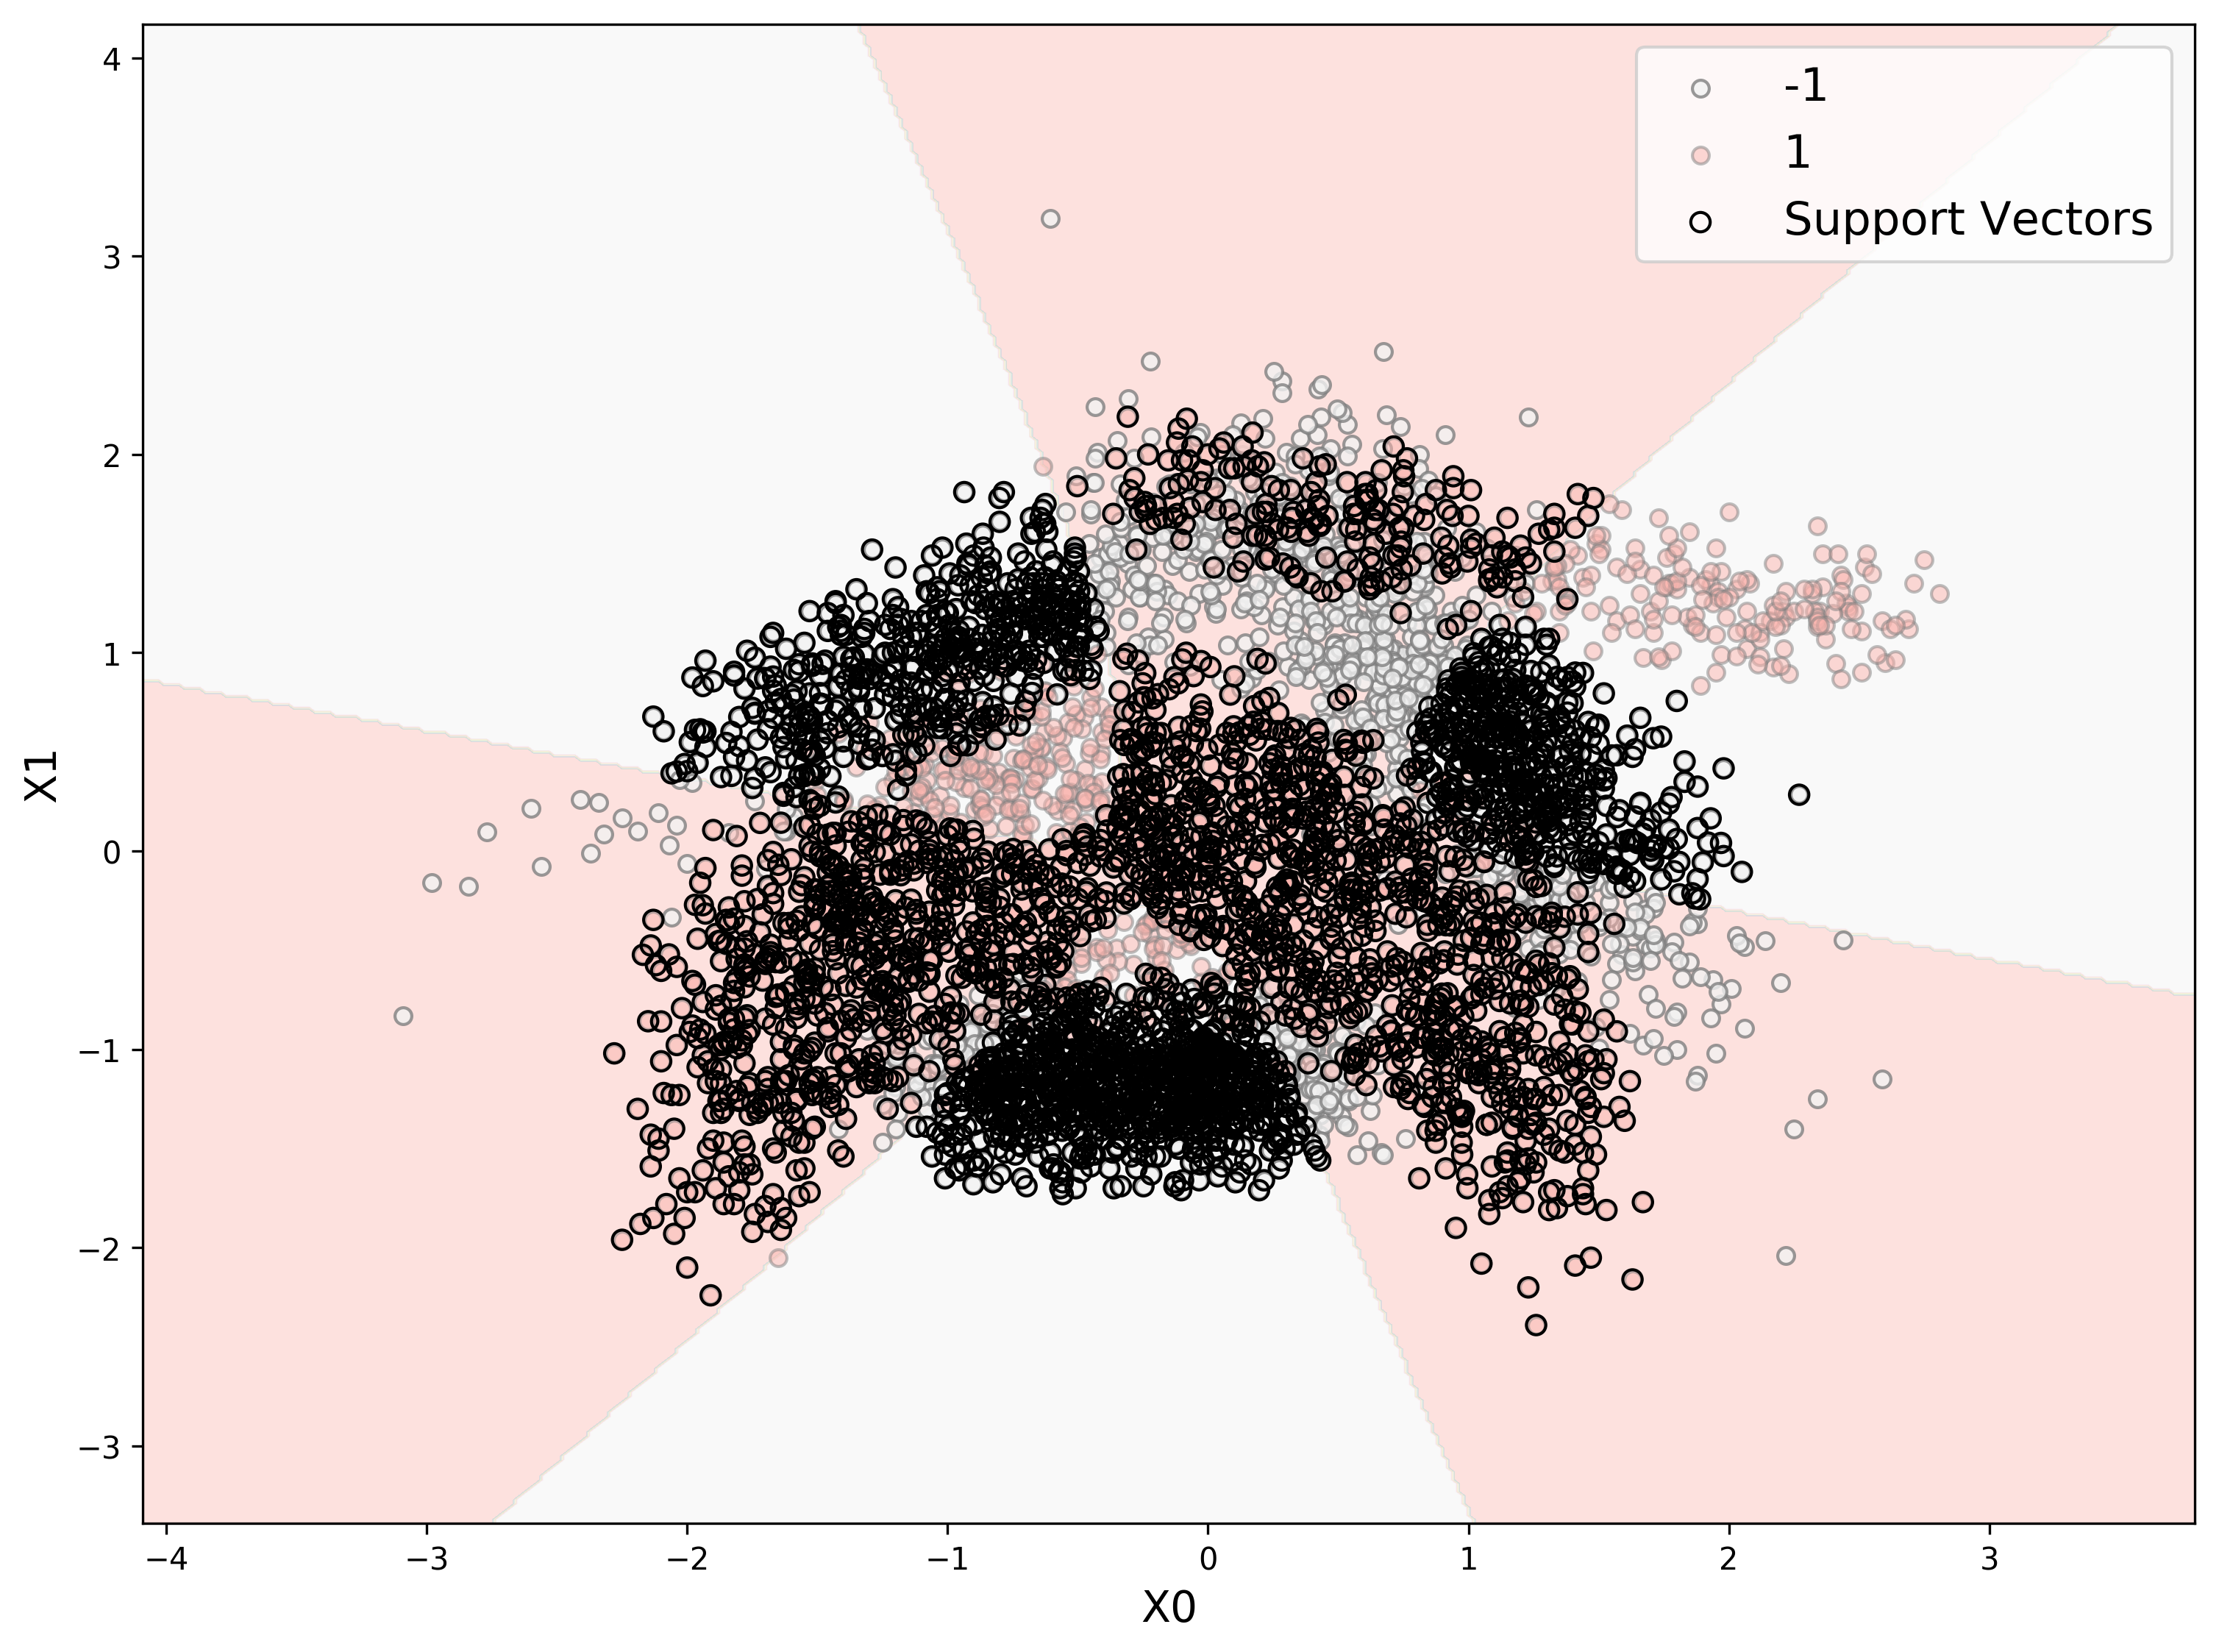

In [8]:
# The worst result: Sigmoid - gamma .5
model = classifiers['Sigmoid - gamma .5']
plot_model_banana_result(model)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


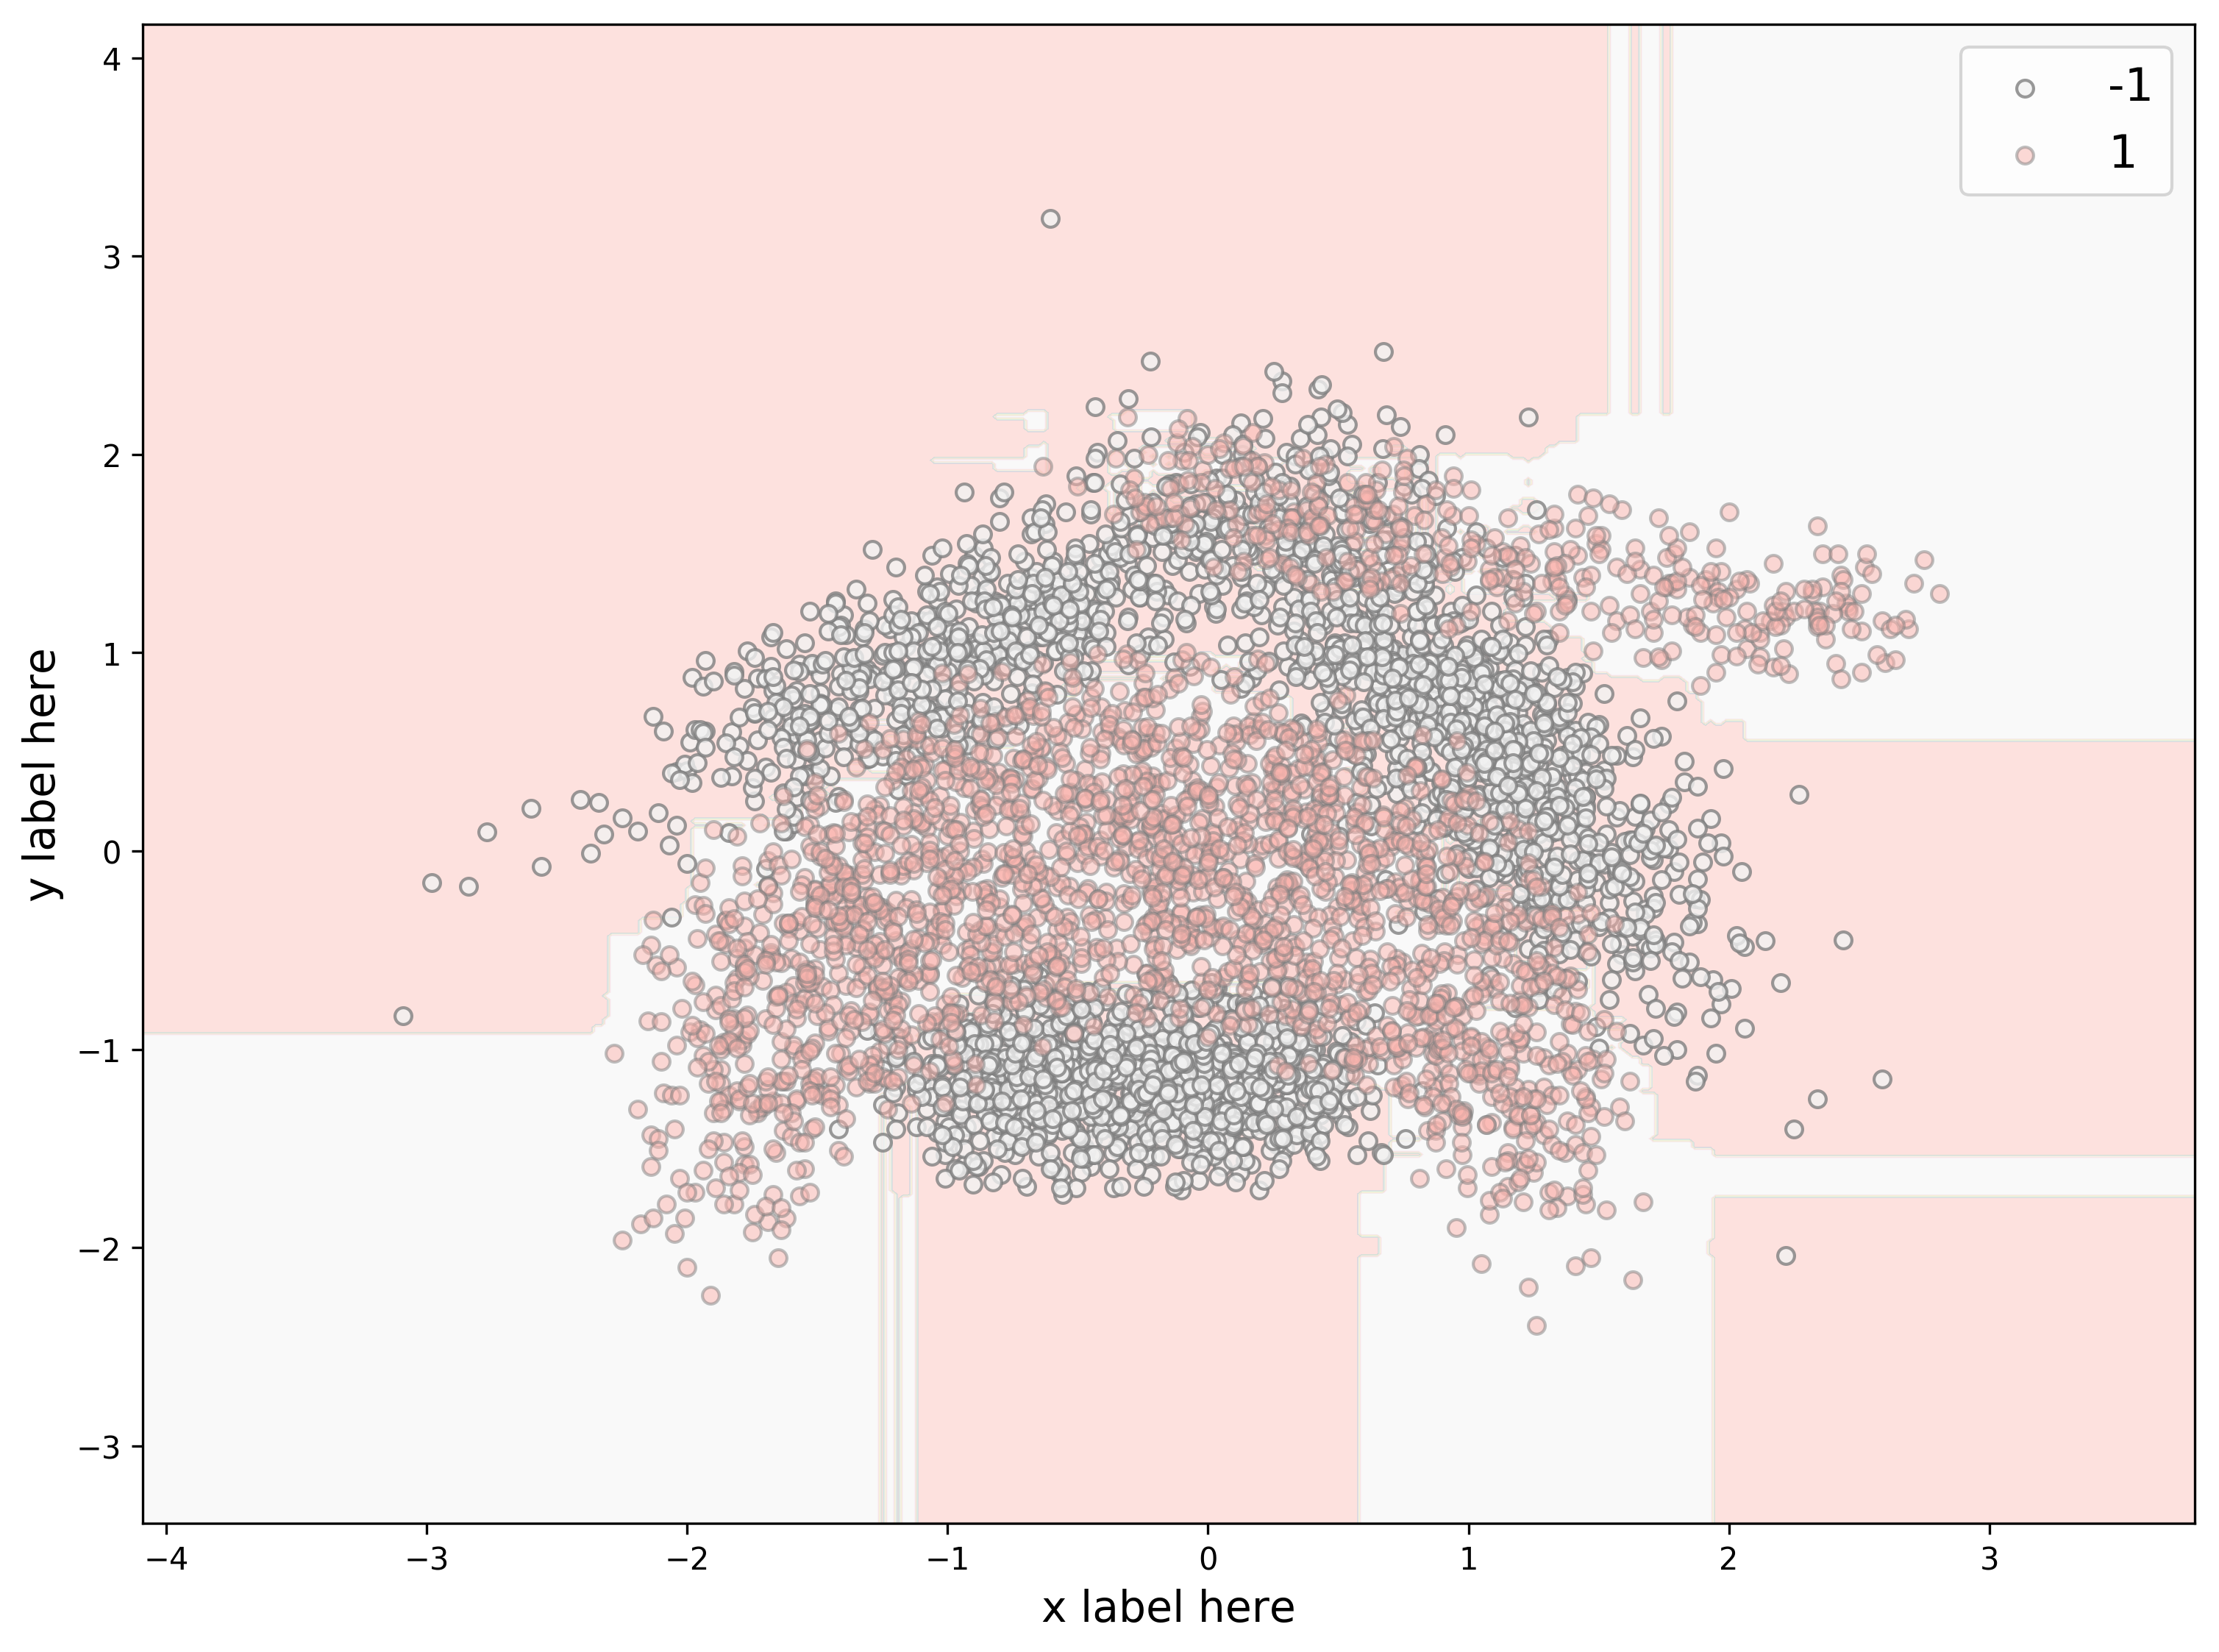

In [11]:
model = classifiers["Random Forest"]
plot_model_banana_result(model)

## Experimento 2

### Part 1

In [25]:
def read_plot_and_classify_data(file_name, n_features, transform=False):    
    data = pd.read_csv(file_name, header=None)
    if transform:
        LE = LabelEncoder()
        data[n_features] = LE.fit_transform(data[n_features])
        
    X, y = data.values[:, :n_features], data.values[:, n_features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents)

    plt.scatter(principalDf[0], principalDf[1],
                c= data[n_features],  
                s=20) 
    
    model = classifiers['RBF - gamma 1']
    model.fit(X_train, y_train)
    print('RBF Score:', model.score(X_test, y_test))
    print('RBF Eout:',1 - model.score(X_test, y_test))
    
    model = classifiers['Random Forest']
    model.fit(X_train, y_train)
    print('Random Forest Score:', model.score(X_test, y_test))
    print('Random Forest Eout:',1 - model.score(X_test, y_test))

#### WINE DATA

RBF Score: 0.2777777777777778
RBF Eout: 0.7222222222222222
Random Forest Score: 0.9722222222222222
Random Forest Eout: 0.02777777777777779


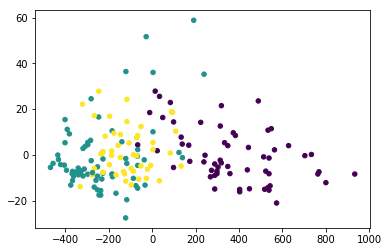

In [26]:
read_plot_and_classify_data('wine.dat', 13)

#### PHONEME DATA

RBF Score: 0.8714153561517114
RBF Eout: 0.1285846438482886
Random Forest Score: 0.9056429232192414
Random Forest Eout: 0.09435707678075855


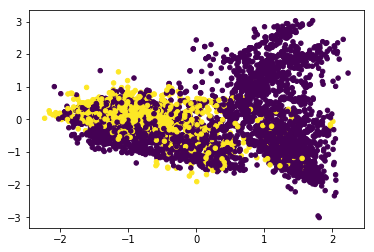

In [27]:
read_plot_and_classify_data('phoneme.dat', 5)

#### MAGIC DATA

RBF Score: 0.6708727655099895
RBF Eout: 0.32912723449001047
Random Forest Score: 0.870136698212408
Random Forest Eout: 0.12986330178759198


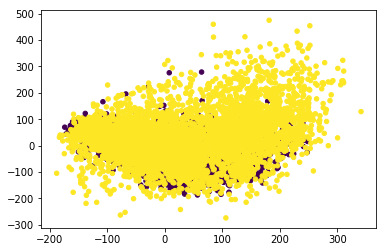

In [28]:
read_plot_and_classify_data('magic.dat', 10, transform=True)

#### HEART DATA

RBF Score: 0.5740740740740741
RBF Eout: 0.42592592592592593
Random Forest Score: 0.7592592592592593
Random Forest Eout: 0.2407407407407407


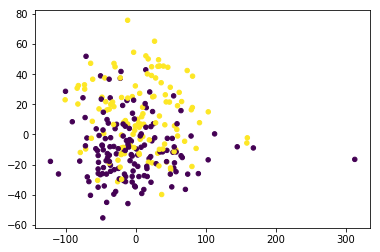

In [29]:
read_plot_and_classify_data('heart.dat', 13)

#### COIL2000 DATA

RBF Score: 0.9455470737913486
RBF Eout: 0.05445292620865139
Random Forest Score: 0.9358778625954198
Random Forest Eout: 0.06412213740458017


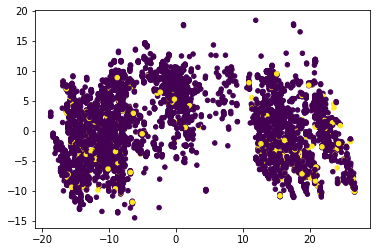

In [30]:
read_plot_and_classify_data('coil2000.dat', 85)

## Experimento 3

In [40]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K



def train_and_plot_neural_network(epochs=1):
    batch_size = 128
    num_classes = 10
    
    # input image dimensions
    img_rows, img_cols = 28, 28

    # the data, split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])


    model_history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(range(len(model_history.history['loss'])),model_history.history['loss'])
    plt.plot(range(len(model_history.history['val_loss'])), model_history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

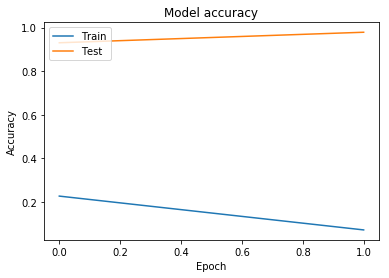

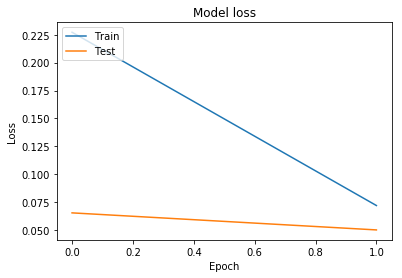

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 200s 3ms/step - loss: 0.2262 - accuracy: 0.9317 - val_loss: 0.0698 - val_accuracy: 0.9797
Test loss: 0.06982702224310487
Test accuracy: 0.9797000288963318


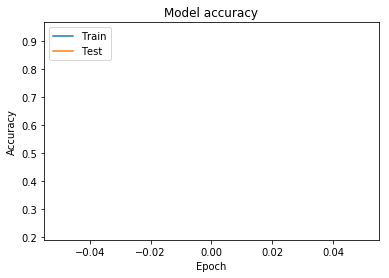

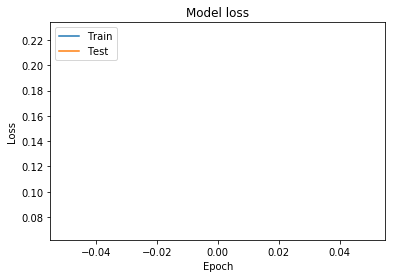

In [41]:
train_and_plot_neural_network(epochs=1)

In [ ]:
train_and_plot_neural_network(epochs=5)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 4864/60000 [=>............................] - ETA: 2:41 - loss: 0.9925 - accuracy: 0.6840